In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/not_pizza')))
print(len(os.listdir('/content/drive/MyDrive/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/not_pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/pizza')))

800
800
183
183


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Pizaa vs. not pizza)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
40/40 [==============================] - 590s 15s/step - loss: 0.8807 - accuracy: 0.5031 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 2/20
40/40 [==============================] - 244s 6s/step - loss: 0.6920 - accuracy: 0.5055 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/20
40/40 [==============================] - 231s 6s/step - loss: 0.6895 - accuracy: 0.5234 - val_loss: 0.6588 - val_accuracy: 0.6406
Epoch 4/20
40/40 [==============================] - 232s 6s/step - loss: 0.6610 - accuracy: 0.6344 - val_loss: 0.6615 - val_accuracy: 0.6875
Epoch 5/20
40/40 [==============================] - 239s 6s/step - loss: 0.6188 - accuracy: 0.6867 - val_loss: 0.6077 - val_accuracy: 0.7188
Epoch 6/20
40/40 [==============================] - 231s 6s/step - loss: 0.5127 - accuracy: 0.7609 - val_loss: 0.6093 - val_accuracy: 0.6687
Epoch 7/20
40/40 [==============================] - 240s 6s/step - loss: 0.3900 - accuracy: 0.8266 - val_loss: 0.6781 - val_accuracy: 0.7125
Epoch 8/20
4

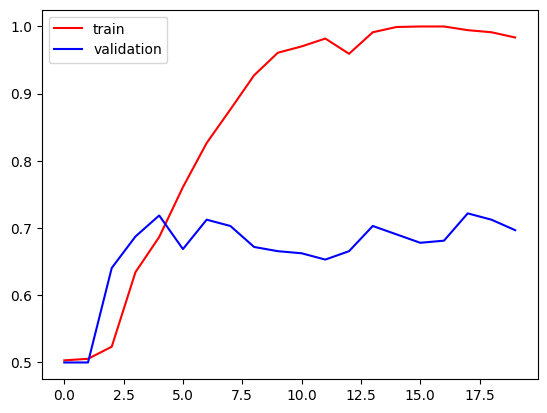

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

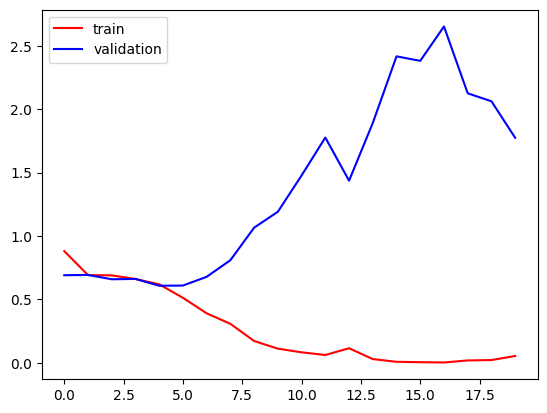

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 366 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

12/12 [==============================] - 177s 16s/step
[[1.41202356e-04]
 [6.99293971e-01]
 [7.01797009e-02]
 [5.14736712e-01]
 [8.80763214e-03]
 [1.74153149e-01]
 [3.30183458e-09]
 [5.75360060e-01]
 [8.44197512e-01]
 [9.67474043e-01]
 [5.68835855e-01]
 [2.51886100e-02]
 [4.80525886e-09]
 [6.67221487e-01]
 [2.17184246e-01]
 [9.93094325e-01]
 [1.12411380e-03]
 [9.98095512e-01]
 [3.58840734e-01]
 [9.99999762e-01]
 [7.48564005e-01]
 [4.86113802e-02]
 [1.12935066e-08]
 [9.90935683e-01]
 [9.99853492e-01]
 [2.31227994e-01]
 [9.85238314e-01]
 [8.14382434e-01]
 [1.23906933e-01]
 [7.44473145e-05]
 [5.44750512e-01]
 [1.78127047e-02]
 [8.43373895e-01]
 [9.95193481e-01]
 [4.30819355e-02]
 [9.97761488e-01]
 [6.03292392e-05]
 [7.68574595e-01]
 [4.04027790e-01]
 [9.33513105e-01]
 [6.28807127e-01]
 [5.33094422e-08]
 [1.76453739e-02]
 [5.36966929e-03]
 [6.86496615e-01]
 [9.56566334e-01]
 [9.98983443e-01]
 [4.97475958e-05]
 [3.80313001e-03]
 [9.99997914e-01]
 [2.77394623e-01]
 [1.51311141e-03]
 [1.16150

In [13]:
len(predictions)

366

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[94 89]
 [92 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       183
           1       0.51      0.50      0.50       183

    accuracy                           0.51       366
   macro avg       0.51      0.51      0.51       366
weighted avg       0.51      0.51      0.51       366



In [15]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [16]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [17]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/not_pizza')))
print(len(os.listdir('/content/drive/MyDrive/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/not_pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/pizza')))

800
800
183
183


In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Pizza vs. not pizza)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [20]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [21]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [22]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [23]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
40/40 [==============================] - 497s 12s/step - loss: 1.6186 - accuracy: 0.5422 - val_loss: 0.6849 - val_accuracy: 0.6000
Epoch 2/3
40/40 [==============================] - 487s 12s/step - loss: 0.6783 - accuracy: 0.6164 - val_loss: 0.6620 - val_accuracy: 0.6125
Epoch 3/3
40/40 [==============================] - 542s 14s/step - loss: 0.6819 - accuracy: 0.6133 - val_loss: 0.6188 - val_accuracy: 0.6344


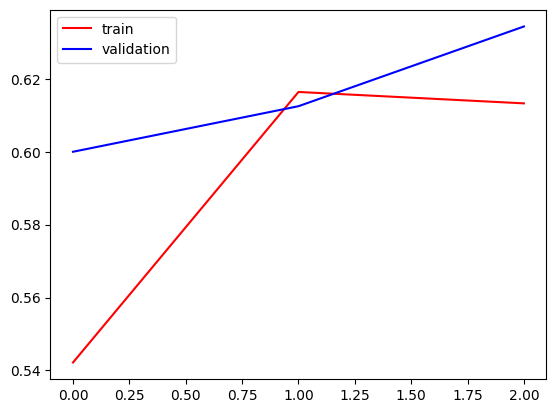

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

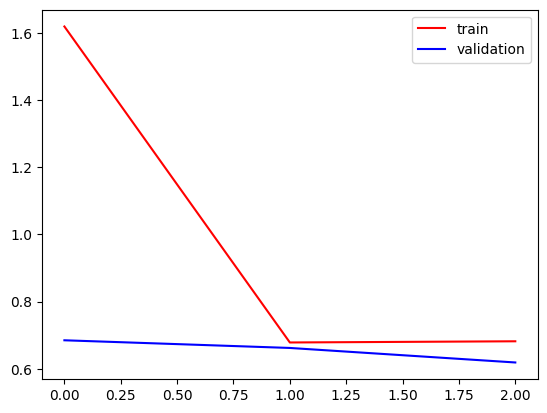

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 366 images belonging to 2 classes.


In [27]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

12/12 [==============================] - 120s 10s/step
[[0.2789396 ]
 [0.51342016]
 [0.79739004]
 [0.49059352]
 [0.04781865]
 [0.41506192]
 [0.6681605 ]
 [0.4274921 ]
 [0.48042753]
 [0.6360015 ]
 [0.38756615]
 [0.35669878]
 [0.76375675]
 [0.7495034 ]
 [0.35413593]
 [0.55962336]
 [0.72094387]
 [0.7073921 ]
 [0.29565775]
 [0.5603917 ]
 [0.75292486]
 [0.8268153 ]
 [0.44260573]
 [0.5239386 ]
 [0.32046133]
 [0.300068  ]
 [0.63450456]
 [0.5459632 ]
 [0.7665667 ]
 [0.7175086 ]
 [0.9421169 ]
 [0.8339994 ]
 [0.12613948]
 [0.7970455 ]
 [0.126926  ]
 [0.84307504]
 [0.9355256 ]
 [0.5875697 ]
 [0.2777195 ]
 [0.8227401 ]
 [0.527722  ]
 [0.67230034]
 [0.44108123]
 [0.45806667]
 [0.50352675]
 [0.3281493 ]
 [0.65725875]
 [0.76586944]
 [0.68900627]
 [0.7413303 ]
 [0.88194495]
 [0.5285313 ]
 [0.5759649 ]
 [0.4269699 ]
 [0.7675512 ]
 [0.2592115 ]
 [0.30989522]
 [0.69877213]
 [0.12473255]
 [0.53720844]
 [0.5906896 ]
 [0.5397323 ]
 [0.9453795 ]
 [0.6258617 ]
 [0.67892236]
 [0.9078315 ]
 [0.2957171 ]
 [0.531

In [28]:
len(predictions)

366

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 67 116]
 [ 58 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.37      0.44       183
           1       0.52      0.68      0.59       183

    accuracy                           0.52       366
   macro avg       0.53      0.52      0.51       366
weighted avg       0.53      0.52      0.51       366

